[Reference](https://medium.com/@hfahmida/outlier-detection-z-score-method-python-pandas-7757d7e005ca)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

Outlier rows:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
15                5.7               4.4                1.5               0.4


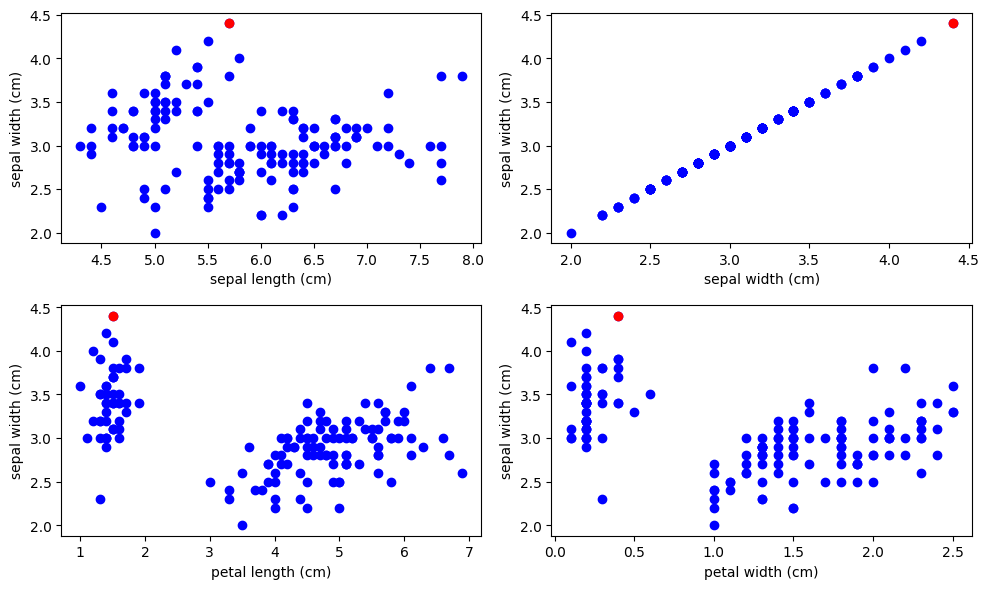

In [2]:
# Load the Iris dataset
iris = load_iris()
data = iris.data
feature_names = iris.feature_names
# Create a DataFrame for the dataset
df = pd.DataFrame(data, columns=feature_names)
# Calculate z-scores for each feature
z_scores = (df - df.mean()) / df.std()
# Set a threshold for outlier detection (e.g., 3 standard deviations)
threshold = 3
# Identify outliers for each feature
outliers = np.abs(z_scores) > threshold
# Find rows containing outliers in any feature
outliers_any = outliers.any(axis=1)
# Print the rows containing outliers
print("Outlier rows:")
print(df[outliers_any])
# Plot the dataset with outliers for each feature
plt.figure(figsize=(10, 6))
for i, feature in enumerate(feature_names):
    plt.subplot(2, 2, i + 1)
    plt.scatter(df[feature], df['sepal width (cm)'], color='b')
    plt.scatter(df.loc[outliers_any, feature], df.loc[outliers_any, 'sepal width (cm)'], color='r')
    plt.xlabel(feature)
    plt.ylabel('sepal width (cm)')
plt.tight_layout()
plt.show()